In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
energy = pd.read_csv("pjm_hourly_est.csv")
energy.index = energy.Datetime
energy = energy[['PJM_Load']]
energy = energy.dropna()
energy.head()

,PJM_Load
Datetime,
1998-12-31 01:00:00,29309.0
1998-12-31 02:00:00,28236.0
1998-12-31 03:00:00,27692.0
1998-12-31 04:00:00,27596.0
1998-12-31 05:00:00,27888.0


In [59]:
energy.describe()

,PJM_Load
count,32896.000000
mean,29766.427408
std,5849.769954
min,17461.000000
25%,25473.000000
50%,29655.000000
75%,33073.250000
max,54030.000000


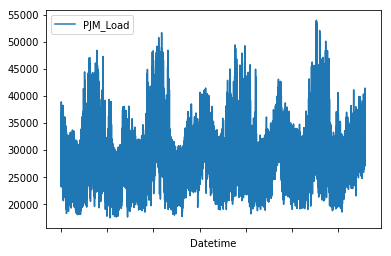

In [60]:
energy.plot()

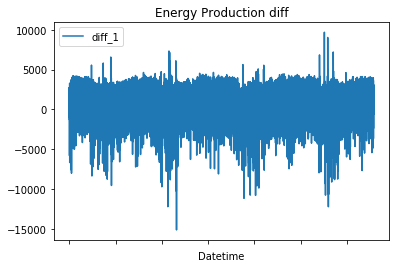

In [61]:
energy['diff_1'] = energy.PJM_Load - energy.PJM_Load.shift()
energy.plot(y='diff_1')
plt.title('Energy Production diff')
plt.show()

Text(0.5, 1.0, 'Energy Production PACF')

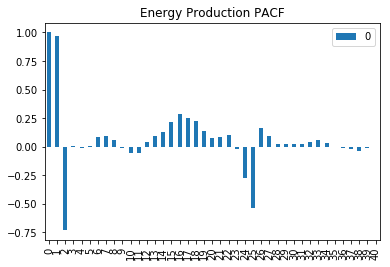

In [62]:
from statsmodels.tsa.stattools import pacf

x_acf = pd.DataFrame(pacf(energy.PJM_Load))
x_acf.plot(kind='bar')
plt.title("Energy Production PACF")

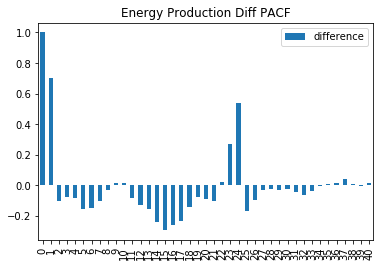

In [63]:
x_acf = pd.DataFrame(pacf(energy.diff_1[1:]))
x_acf.plot(kind='bar')
plt.title("Energy Production Diff PACF")
plt.legend(['difference'])

In [64]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(energy.PJM_Load, order=(0,1,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:             D.PJM_Load   No. Observations:                32895
Model:                 ARIMA(0, 1, 0)   Log Likelihood             -287929.142
Method:                           css   S.D. of innovations           1531.553
Date:                Tue, 17 Sep 2019   AIC                         575862.284
Time:                        22:23:30   BIC                         575879.086
Sample:                             1   HQIC                        575867.652
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0060      8.444      0.001      0.999     -16.545      16.557
Residuals Description
count    3.289500e+04
mean    -1.775028e-14
std      1.531576e+03
min     -1.514101e+04
25%     -7.150060e+02

/Users/nickdelucchi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/nickdelucchi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/nickdelucchi/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

/Users/nickdelucchi/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning:

Using a non-tuple sequence for multidimensional in

In [65]:
model = ARIMA(energy.PJM_Load, order=(1,0,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

/Users/nickdelucchi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/nickdelucchi/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

/Users/nickdelucchi/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

/Users/nickdelucchi/anaconda3/

                              ARMA Model Results                              
Dep. Variable:               PJM_Load   No. Observations:                32896
Model:                     ARMA(1, 0)   Log Likelihood             -287654.439
Method:                       css-mle   S.D. of innovations           1518.350
Date:                Tue, 17 Sep 2019   AIC                         575314.877
Time:                        22:23:51   BIC                         575340.081
Sample:                             0   HQIC                        575322.929
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2.977e+04    243.839    122.074      0.000    2.93e+04    3.02e+04
ar.L1.PJM_Load     0.9657      0.001    675.090      0.000       0.963       0.969
                                    

In [66]:
model = ARIMA(energy.PJM_Load, order=(1,0,1))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

/Users/nickdelucchi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                              ARMA Model Results                              
Dep. Variable:               PJM_Load   No. Observations:                32896
Model:                     ARMA(1, 1)   Log Likelihood             -279615.207
Method:                       css-mle   S.D. of innovations           1189.136
Date:                Tue, 17 Sep 2019   AIC                         559238.414
Time:                        22:24:10   BIC                         559272.019
Sample:                             0   HQIC                        559249.149
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2.977e+04    198.996    149.583      0.000    2.94e+04    3.02e+04
ar.L1.PJM_Load     0.9476      0.002    534.008      0.000       0.944       0.951
ma.L1.PJM_Load     0.5900      0.004

In [67]:
model = ARIMA(energy.PJM_Load, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

/Users/nickdelucchi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/nickdelucchi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                             ARIMA Model Results                              
Dep. Variable:             D.PJM_Load   No. Observations:                32895
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -276659.749
Method:                       css-mle   S.D. of innovations           1087.286
Date:                Tue, 17 Sep 2019   AIC                         553327.499
Time:                        22:24:35   BIC                         553361.103
Sample:                             1   HQIC                        553338.234
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0060     18.726      0.000      1.000     -36.697      36.709
ar.L1.D.PJM_Load     0.6418      0.006    111.865      0.000       0.631       0.653
ma.L1.D.PJM_Load     0.1190 

In [68]:
model = ARIMA(energy.PJM_Load, order=(5,1,5))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

/Users/nickdelucchi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/nickdelucchi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                             ARIMA Model Results                              
Dep. Variable:             D.PJM_Load   No. Observations:                32895
Model:                 ARIMA(5, 1, 5)   Log Likelihood             -273126.068
Method:                       css-mle   S.D. of innovations            976.466
Date:                Tue, 17 Sep 2019   AIC                         546276.137
Time:                        22:28:48   BIC                         546376.950
Sample:                             1   HQIC                        546308.343
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0054      1.670     -0.003      0.997      -3.279       3.268
ar.L1.D.PJM_Load     1.2779      0.006    205.020      0.000       1.266       1.290
ar.L2.D.PJM_Load    -0.5260 

In [ ]:
model = ARIMA(energy.PJM_Load, order=(48,1,5))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

/Users/nickdelucchi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/nickdelucchi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

